In [1]:
# Import needed packages
# You may add or remove packages should you need them
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score

# Set random seed
np.random.seed(0)

# Display plots inline and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Set Seaborn aesthetic parameters to defaults
sns.set()

In [2]:
# Load the Iris dataset included with scikit-learn
dataset = load_iris()

In [3]:
# Put data in a pandas DataFrame
df_iris = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [4]:
# Add target and class to DataFrame
df_iris['target']= dataset.target

In [5]:
# Show 10 random samples
df_iris.sample(n=10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
114,5.8,2.8,5.1,2.4,2
62,6.0,2.2,4.0,1.0,1
33,5.5,4.2,1.4,0.2,0
107,7.3,2.9,6.3,1.8,2
7,5.0,3.4,1.5,0.2,0
100,6.3,3.3,6.0,2.5,2
40,5.0,3.5,1.3,0.3,0
86,6.7,3.1,4.7,1.5,1
76,6.8,2.8,4.8,1.4,1
71,6.1,2.8,4.0,1.3,1


In [6]:
# now... implement the LDA (bear in mind that you do pass it the y's and it is supervised!)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [7]:
# same process as always, identify your X's and your y's
X = df_iris.drop((['target']), axis=1,)
y = df_iris['target']

In [8]:
#train-test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=8)


In [9]:
# Scale the X's
x_scaled = StandardScaler().fit(X_train)
X_train = x_scaled.transform(X_train)
X_test = x_scaled.transform(X_test)


In [22]:
print(X_train)

[[-0.88914552  1.640867   -1.042719   -1.04605907]
 [-1.2574912  -0.12113783 -1.3251711  -1.44121255]
 [-1.50305498  1.20036579 -1.55113278 -1.30949472]
 [ 1.07536473  0.53961398  1.10391696  1.19314397]
 [-0.39801796 -1.00214025  0.3695415   0.00768354]
 [ 1.19814662 -0.56163904  0.59550318  0.27111919]
 [ 0.33867338 -1.00214025  1.04742654  0.27111919]
 [-0.27523607 -0.12113783  0.20007024  0.13940137]
 [-0.39801796  2.52186942 -1.3251711  -1.30949472]
 [-0.15245418 -0.34138844  0.25656066  0.13940137]
 [-0.27523607 -1.22239085  0.0870894  -0.12403429]
 [-1.62583687 -1.66289206 -1.38166152 -1.1777769 ]
 [ 0.21589149 -0.34138844  0.42603192  0.40283702]
 [ 0.95258283 -0.34138844  0.48252234  0.13940137]
 [ 0.0931096  -0.12113783  0.76497444  0.7979905 ]
 [-1.01192742  0.53961398 -1.3251711  -1.30949472]
 [-1.01192742  0.98011519 -1.21219026 -0.78262342]
 [-1.01192742  0.98011519 -1.38166152 -1.1777769 ]
 [ 1.32092851  0.09911277  0.9344457   1.19314397]
 [ 0.70701905 -0.78188964  0.87

In [25]:
# apply the lda transformation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


In [26]:
print(X_train)

[[ 6.55435046]
 [ 7.15860469]
 [ 8.33444133]
 [-5.66369485]
 [-2.29710274]
 [-2.30164317]
 [-4.889846  ]
 [-1.33065133]
 [ 9.07934951]
 [-1.58616074]
 [-0.988858  ]
 [ 5.60137715]
 [-2.53373178]
 [-1.63403753]
 [-4.63191791]
 [ 7.44453453]
 [ 6.1289134 ]
 [ 7.63258461]
 [-5.11218325]
 [-5.29640269]
 [-5.83575629]
 [-5.13233557]
 [ 6.62312988]
 [ 6.38124619]
 [-0.9525289 ]
 [-0.99761025]
 [-0.18112722]
 [ 6.97339819]
 [ 7.73741586]
 [-3.41767414]
 [-7.81259373]
 [ 7.37887596]
 [-1.50578549]
 [-3.90527216]
 [ 0.37114231]
 [ 6.33587995]
 [-6.81856547]
 [-2.26919285]
 [-2.35580981]
 [ 8.22890029]
 [-1.36561219]
 [-6.70914564]
 [-7.26941711]
 [ 7.69309244]
 [-5.31598523]
 [-4.94717721]
 [-1.9395499 ]
 [-2.1355943 ]
 [ 8.75604774]
 [ 6.93143769]
 [ 7.76930402]
 [ 7.45328678]
 [-2.43273117]
 [-5.40615556]
 [-0.83505899]
 [-8.82484389]
 [ 8.04051717]
 [-3.99127881]
 [-6.58160339]
 [ 8.36693979]
 [-4.24678822]
 [ 6.7258831 ]
 [ 7.25752727]
 [-5.47006913]
 [ 7.36415928]
 [-0.40025176]
 [ 8.11706

In [11]:
# select 2 principal components
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train2 = lda.fit_transform(X_train, y_train)
X_test2 = lda.transform(X_test)
print(X_train2)

[[ 6.55435046e+00  9.84306923e-01]
 [ 7.15860469e+00 -1.13135108e+00]
 [ 8.33444133e+00  6.78835127e-01]
 [-5.66369485e+00  1.36045800e+00]
 [-2.29710274e+00 -1.67386098e+00]
 [-2.30164317e+00 -5.99586820e-01]
 [-4.88984600e+00 -2.02650704e+00]
 [-1.33065133e+00 -2.61473292e-01]
 [ 9.07934951e+00  1.94447977e+00]
 [-1.58616074e+00 -5.25452387e-01]
 [-9.88858004e-01 -1.64351303e+00]
 [ 5.60137715e+00 -2.14470556e+00]
 [-2.53373178e+00 -1.78677473e-01]
 [-1.63403753e+00 -5.34740346e-01]
 [-4.63191791e+00  2.01395477e-01]
 [ 7.44453453e+00 -1.64592487e-01]
 [ 6.12891340e+00  1.08122685e+00]
 [ 7.63258461e+00  6.01832995e-01]
 [-5.11218325e+00  1.28662480e+00]
 [-5.29640269e+00 -1.70424519e-01]
 [-5.83575629e+00 -3.47646803e-01]
 [-5.13233557e+00  2.00851994e+00]
 [ 6.62312988e+00 -9.83708786e-01]
 [ 6.38124619e+00 -1.25055558e+00]
 [-9.52528900e-01 -2.46508859e+00]
 [-9.97610255e-01 -1.80451147e+00]
 [-1.81127217e-01 -1.83701745e+00]
 [ 6.97339819e+00 -2.12423059e-01]
 [ 7.73741586e+00 -1

<AxesSubplot:>

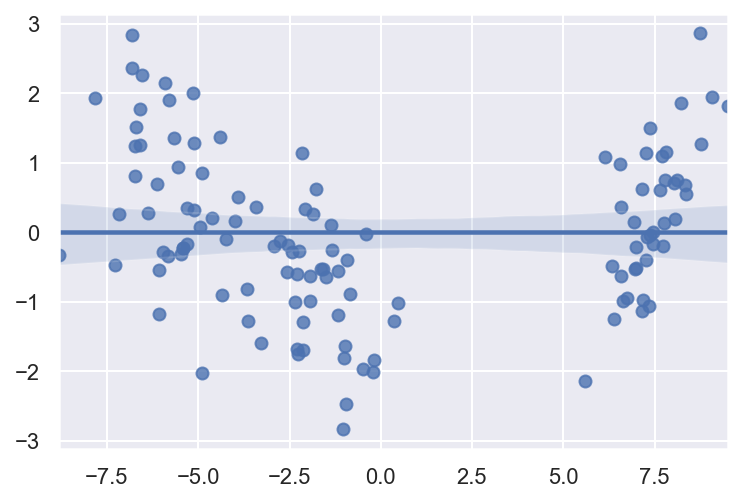

In [12]:
# take a look at the new axes for the data and plot them
sns.regplot(x=X_train2[:,0], y=X_train2[:,1])

In [13]:
# what about the variability?
var_exp = lda.explained_variance_ratio_

print(var_exp)

[0.98768656 0.01231344]


In [14]:
# Run a Random Forest Classifier with the transformed data
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
predict_y = classifier.predict(X_test)

print(predict_y)

[0 0 0 2 1 0 0 2 2 1 1 0 1 1 1 2 2 2 2 1 1 0 1 1 1 0 2 0 0 2]


In [15]:
#Check the new acuracy! Is it higher or lower than what you obtain selecting 2 features and applying a Random Forest Directly?
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predict_y))

0.8666666666666667
